In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Sensor Verification/06-08-2024_17-51-26_Mangnetometer_sensor_data.csv')

In [4]:
# Convert timestamp to datetime
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

def calculate_avg(start_time, end_time ):
    mask = (df['TimeStamp'] >= start_time) & (df['TimeStamp'] <= end_time)
    filtered_df = df[mask]

    # Calculate the average values for the sensor measurements
    return filtered_df.drop(columns=['TimeStamp']).mean()

def mini_dataframe(df,start_time, end_time ):
    mask = (df['TimeStamp'] >= start_time) & (df['TimeStamp'] <= end_time)
   
    return df[mask]

# separating data frames for each test run
Test1_values = mini_dataframe(df,'2024-08-06T17:46:23.854961', '2024-08-06T17:48:21.189176')
Test2_values = mini_dataframe(df,'2024-08-06T17:48:21.745469', '2024-08-06T17:50:05.715518')
Test3_values = mini_dataframe(df,'2024-08-06T17:50:06.555078', '2024-08-06T17:51:04.886297')

# Calculate the average values for the sensor measurements
Test1_values_avg = calculate_avg('2024-08-06T17:46:23.854961', '2024-08-06T17:48:21.189176')
Test2_values_avg = calculate_avg('2024-08-06T17:48:21.745469', '2024-08-06T17:50:05.715518')
Test3_values_avg = calculate_avg('2024-08-06T17:50:06.555078', '2024-08-06T17:51:04.886297')

Test1_values_avg.head()

sensor_1_X [mT]    2.848519
sensor_1_Y [mT]    3.138425
sensor_1_Z [mT]    9.085921
sensor_2_X [mT]    2.151452
sensor_2_Y [mT]    2.065205
dtype: float64

In [5]:
np.sqrt(Test1_values_avg.iloc[45]**2 + Test1_values_avg.iloc[46]**2 + Test1_values_avg.iloc[47]**2)

9.633446032455609

In [6]:
Gaussmeter_test1 = pd.read_csv('Sensor Verification/Gaussmeter_test_1.csv')
Gaussmeter_test1["x"] *= -1 
Gaussmeter_test1["y"] *= -1


Gaussmeter_test2 = pd.read_csv('Sensor Verification/Gaussmeter_test_2.csv')
Gaussmeter_test2["x"] *= -1 
Gaussmeter_test2["y"] *= -1



Gaussmeter_test3 = pd.read_csv('Sensor Verification/Gaussmeter_test_3.csv')
Gaussmeter_test3["x"] *= -1 
Gaussmeter_test3["y"] *= -1


In [7]:
Gaussmeter_test1_flatten = Gaussmeter_test1.iloc[1:,1:].values.flatten()
Gaussmeter_test2_flatten = Gaussmeter_test2.iloc[1:,1:].values.flatten()
Gaussmeter_test3_flatten = Gaussmeter_test3.iloc[1:,1:].values.flatten()

In [8]:
Error1 = Test1_values_avg.values - Gaussmeter_test1.iloc[1:,1:].values.flatten()
Error2 = Test2_values_avg.values - Gaussmeter_test2.iloc[1:,1:].values.flatten()
Error3 = Test3_values_avg.values - Gaussmeter_test3.iloc[1:,1:].values.flatten()

In [9]:
# calculating magnitude for the mean measured magnetic field by MLX90393
Test1_values_Mag = []
Test2_values_Mag = []
Test3_values_Mag = []

Gaussmeter_test1_Mag = []
Gaussmeter_test2_Mag = []
Gaussmeter_test3_Mag = []

for i in range(16):
    Test1_values_Mag.append(np.sqrt(Test1_values_avg.iloc[i*3]**2 + Test1_values_avg.iloc[i*3+1]**2 + Test1_values_avg.iloc[i*3+2]**2))
    Test2_values_Mag.append(np.sqrt(Test2_values_avg.iloc[i*3]**2 + Test2_values_avg.iloc[i*3+1]**2 + Test2_values_avg.iloc[i*3+2]**2))
    Test3_values_Mag.append(np.sqrt(Test3_values_avg.iloc[i*3]**2 + Test3_values_avg.iloc[i*3+1]**2 + Test3_values_avg.iloc[i*3+2]**2))
    
    
    Gaussmeter_test1_Mag.append(np.sqrt(Gaussmeter_test1_flatten[i*3]**2 + Gaussmeter_test1_flatten[i*3+1]**2 + Gaussmeter_test1_flatten[i*3+2]**2))
    Gaussmeter_test2_Mag.append(np.sqrt(Gaussmeter_test2_flatten[i*3]**2 + Gaussmeter_test2_flatten[i*3+1]**2 + Gaussmeter_test2_flatten[i*3+2]**2))
    Gaussmeter_test3_Mag.append(np.sqrt(Gaussmeter_test3_flatten[i*3]**2 + Gaussmeter_test3_flatten[i*3+1]**2 + Gaussmeter_test3_flatten[i*3+2]**2))
    


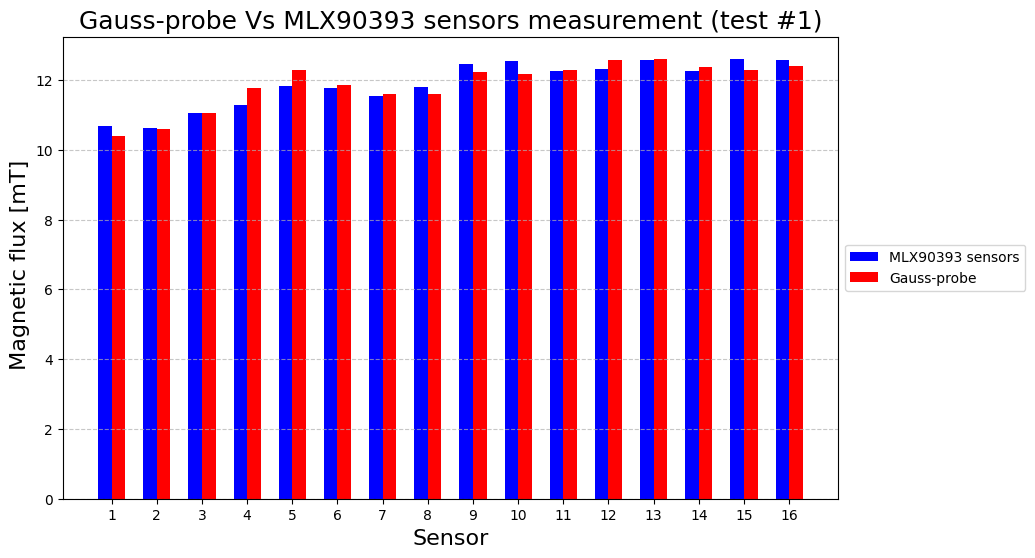

In [10]:
# bar plot
# Bar width
bar_width = 0.3

# X-axis positions for each bar
index = np.arange(1,17)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Increase size as needed

for i in range(16):

    bars1 = ax.bar(index[i] - bar_width*0.5, Test3_values_Mag[i], bar_width, color='b', label = 'MLX90393 sensors'if i == 0 else "" )
    bars2 = ax.bar(index[i] + bar_width*0.5, Gaussmeter_test3_Mag[i], bar_width, color='r', label = 'Gauss-probe'if i == 0 else "")
    

# Add labels, title, and legend
ax.set_xlabel('Sensor', fontsize=16)
ax.set_ylabel(' Magnetic flux [mT]', fontsize=16)
ax.set_title('Gauss-probe Vs MLX90393 sensors measurement (test #1)', fontsize=18)
ax.set_xticks(index)  # Set x-axis ticks to the categories
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

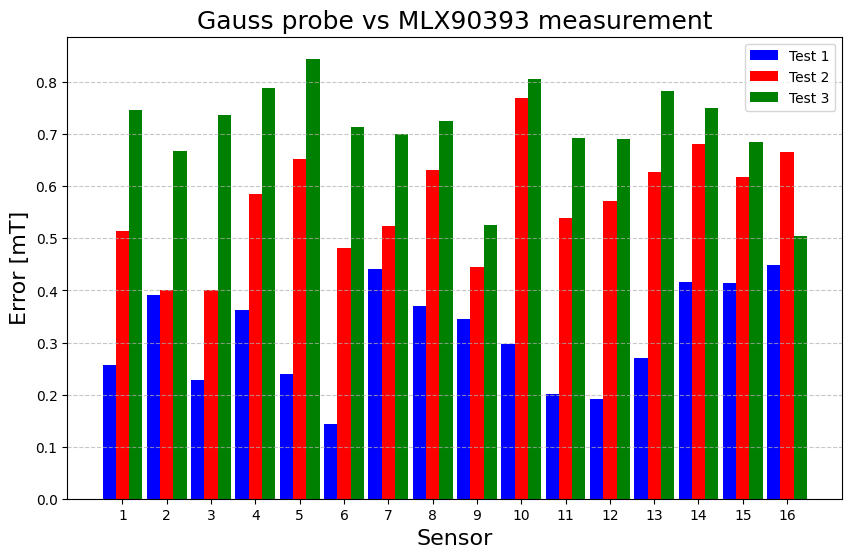

In [11]:
Error_Mag_1 = []
Error_Mag_2 = []
Error_Mag_3 = []



for i in range(16):
    Error_Mag_1.append(np.sqrt(Error1[i*3]**2 + Error1[i*3+1]**2 + Error1[i*3+2]**2))
    Error_Mag_2.append(np.sqrt(Error2[i*3]**2 + Error2[i*3+1]**2 + Error2[i*3+2]**2))
    Error_Mag_3.append(np.sqrt(Error3[i*3]**2 + Error3[i*3+1]**2 + Error3[i*3+2]**2))
    
# bar plot
# Bar width
bar_width = 0.3

# X-axis positions for each bar
index = np.arange(1,17)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Increase size as needed

for i in range(16):
    bars1 = ax.bar(index[i] - bar_width, Error_Mag_1[i], bar_width, color='b', label = 'Test 1' if i == 0 else "")
    bars2 = ax.bar(index[i], Error_Mag_2[i], bar_width, color='r', label = 'Test 2' if i == 0 else "" )
    bars3 = ax.bar(index[i] + bar_width, Error_Mag_3[i], bar_width, color='g', label = 'Test 3' if i == 0 else "")



# Add labels, title, and legend
ax.set_xlabel('Sensor', fontsize=16)
ax.set_ylabel('Error [mT]', fontsize=16)
ax.set_title('Gauss probe vs MLX90393 measurement', fontsize=18)
ax.set_xticks(index)  # Set x-axis ticks to the categories
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Show the plot
plt.show()

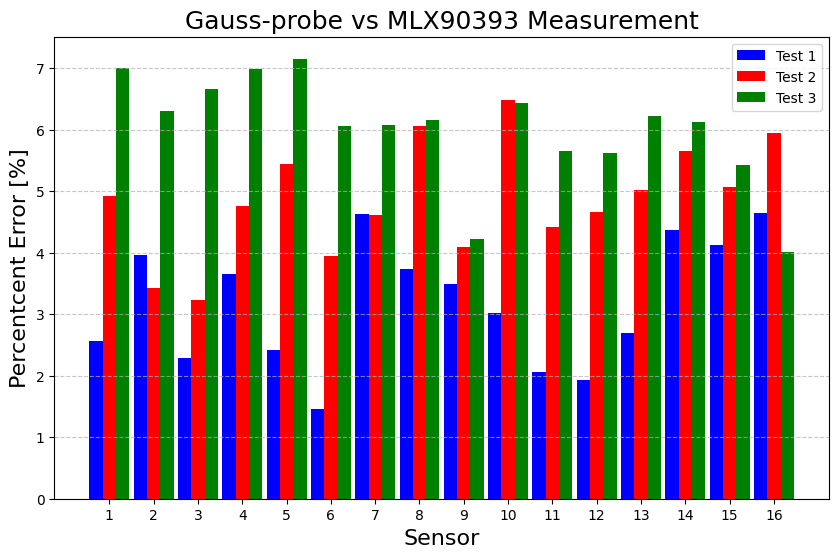

In [13]:
Error_percentage_test_1 = list(map(lambda a, b: a*100 / b, Error_Mag_1, Test1_values_Mag))
Error_percentage_test_2 = list(map(lambda a, b: a*100/ b, Error_Mag_2, Test2_values_Mag))
Error_percentage_test_3 = list(map(lambda a, b: a*100 / b, Error_Mag_3, Test3_values_Mag))

  
# bar plot
# Bar width
bar_width = 0.3

# X-axis positions for each bar
index = np.arange(1,17)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Increase size as needed

for i in range(16):
    bars1 = ax.bar(index[i] - bar_width, Error_percentage_test_1 [i], bar_width, color='b', label = 'Test 1' if i == 0 else "")
    bars2 = ax.bar(index[i], Error_percentage_test_2[i], bar_width, color='r', label = 'Test 2' if i == 0 else "" )
    bars3 = ax.bar(index[i] + bar_width, Error_percentage_test_3[i], bar_width, color='g', label = 'Test 3' if i == 0 else "")



# Add labels, title, and legend
ax.set_xlabel('Sensor', fontsize=16)
ax.set_ylabel('Percentcent Error [%]', fontsize=16)
ax.set_title('Gauss-probe vs MLX90393 Measurement', fontsize=18)
ax.set_xticks(index)  # Set x-axis ticks to the categories
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Show the plot
plt.show()

In [151]:
print(Error_percentage_test_1)

[0.025485206398981913, 0.03871099482872529, 0.022526384908548903, 0.03583910776634587, 0.023864024736567173, 0.014580308344467805, 0.04479352632184024, 0.036835077756168184, 0.03454600189338462, 0.030404551831773485, 0.02067140314589003, 0.019272465757967764, 0.027233441232085147, 0.04236128561503853, 0.04210295861937041, 0.04537587702679929, 0.025485206398981913, 0.03871099482872529, 0.022526384908548903, 0.03583910776634587, 0.023864024736567173, 0.014580308344467805, 0.04479352632184024, 0.036835077756168184, 0.03454600189338462, 0.030404551831773485, 0.02067140314589003, 0.019272465757967764, 0.027233441232085147, 0.04236128561503853, 0.04210295861937041, 0.04537587702679929, 0.025485206398981913, 0.03871099482872529, 0.022526384908548903, 0.03583910776634587, 0.023864024736567173, 0.014580308344467805, 0.04479352632184024, 0.036835077756168184, 0.03454600189338462, 0.030404551831773485, 0.02067140314589003, 0.019272465757967764, 0.027233441232085147, 0.04236128561503853, 0.0421029

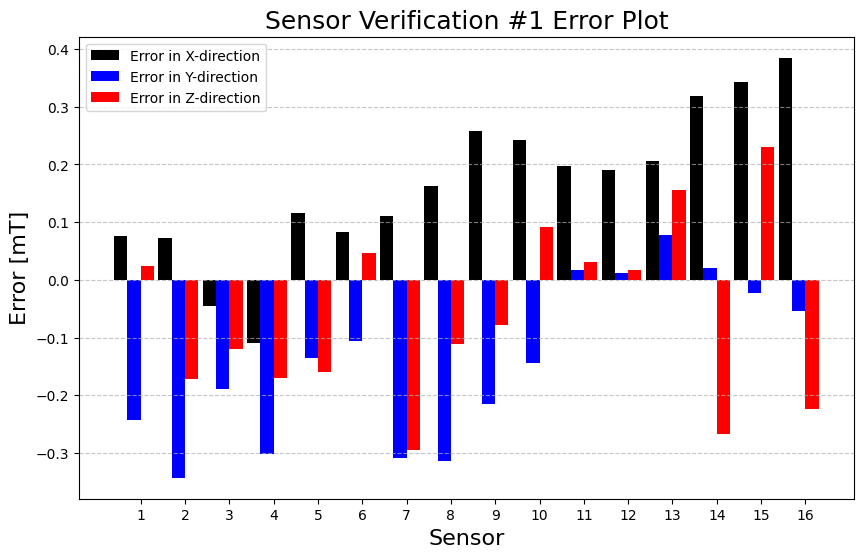

In [95]:
# bar plot
# Bar width
bar_width = 0.3

# X-axis positions for each bar
index = np.arange(1,17)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Increase size as needed



for i in range(16):
# Plot bars for each product
    bars1 = ax.bar(index[i] - bar_width*1.5, Error1[i*3], bar_width, color='black', label='Error in X-direction' if i == 0 else "")
    bars2 = ax.bar(index[i] - bar_width*0.5, Error1[i*3+1], bar_width,  color='blue', label='Error in Y-direction' if i == 0 else "" )
    bars3 = ax.bar(index[i] + bar_width*0.5, Error1[i*3+2], bar_width, color = "red", label='Error in Z-direction' if i == 0 else "")


# Add labels, title, and legend
ax.set_xlabel('Sensor', fontsize=16)
ax.set_ylabel('Error [mT]', fontsize=16)
ax.set_title('Sensor Verification #1 Error Plot', fontsize=18)
ax.set_xticks(index)  # Set x-axis ticks to the categories
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Show the plot
plt.show()

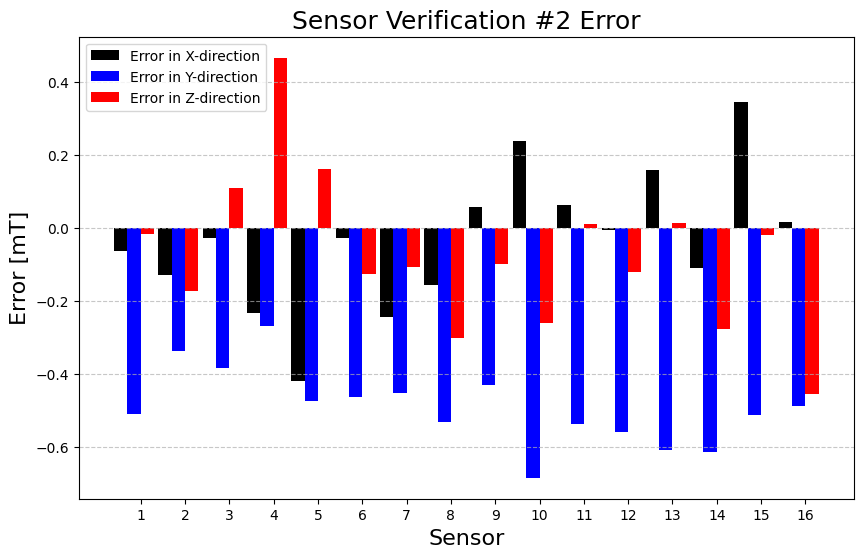

In [87]:
# bar plot
# Bar width
bar_width = 0.3

# X-axis positions for each bar
index = np.arange(1,17)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Increase size as needed



for i in range(16):
# Plot bars for each product
    bars1 = ax.bar(index[i] - bar_width*1.5, Error2[i*3], bar_width, color='black', label='Error in X-direction' if i == 0 else "")
    bars2 = ax.bar(index[i] - bar_width*0.5, Error2[i*3+1], bar_width,  color='blue', label='Error in Y-direction' if i == 0 else "" )
    bars3 = ax.bar(index[i] + bar_width*0.5, Error2[i*3+2], bar_width, color = "red", label='Error in Z-direction' if i == 0 else "")


# Add labels, title, and legend
ax.set_xlabel('Sensor', fontsize=16)
ax.set_ylabel('Error [mT]', fontsize=16)
ax.set_title('Sensor Verification #2 Error', fontsize=18)
ax.set_xticks(index)  # Set x-axis ticks to the categories
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Show the plot
plt.show()

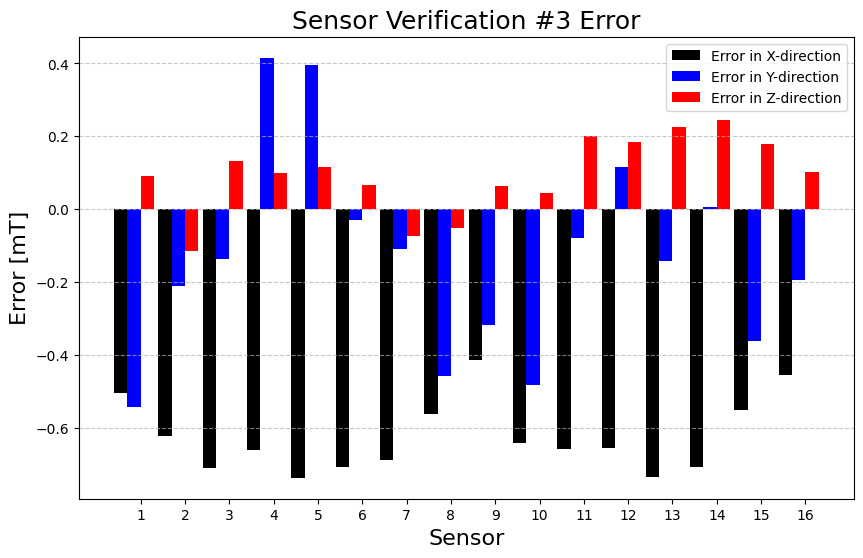

In [96]:
# bar plot
# Bar width
bar_width = 0.3

# X-axis positions for each bar
index = np.arange(1,17)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))  # Increase size as needed



for i in range(16):
# Plot bars for each product
    bars1 = ax.bar(index[i] - bar_width*1.5, Error3[i*3], bar_width, color='black', label='Error in X-direction' if i == 0 else "")
    bars2 = ax.bar(index[i] - bar_width*0.5, Error3[i*3+1], bar_width,  color='blue', label='Error in Y-direction' if i == 0 else "" )
    bars3 = ax.bar(index[i] + bar_width*0.5, Error3[i*3+2], bar_width, color = "red", label='Error in Z-direction' if i == 0 else "")


# Add labels, title, and legend
ax.set_xlabel('Sensor', fontsize=16)
ax.set_ylabel('Error [mT]', fontsize=16)
ax.set_title('Sensor Verification #3 Error', fontsize=18)
ax.set_xticks(index)  # Set x-axis ticks to the categories
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Show the plot
plt.show()

In [89]:

def plot_sensor_ver(sensor_measurement, Gaussmeter_measurement,dir, title):
    # Plotting box plot for all sensor columns
    plt.figure(figsize=(20, 6))  # Set the figure size
    Box_plot = sensor_measurement[['sensor_1_'+ dir + ' [mT]', 'sensor_2_'+ dir + ' [mT]', 'sensor_3_'+ dir + ' [mT]', 'sensor_4_'+ dir + ' [mT]',
                'sensor_5_'+ dir + ' [mT]', 'sensor_6_'+ dir + ' [mT]', 'sensor_7_'+ dir + ' [mT]', 'sensor_8_'+ dir + ' [mT]',
                'sensor_9_'+ dir + ' [mT]', 'sensor_10_'+ dir + ' [mT]', 'sensor_11_'+ dir + ' [mT]', 'sensor_12_'+ dir + ' [mT]',
                'sensor_13_'+ dir + ' [mT]', 'sensor_14_'+ dir + ' [mT]', 'sensor_15_'+ dir + ' [mT]', 'sensor_16_'+ dir + ' [mT]'
                ]].plot(kind='box')

    # Rename the x-axis labels directly in the plot
    Box_plot.set_xticklabels([  '1', '2', '3', '4',
                                '5', '6', '7', '8',
                                '9', '10', '11', '12',
                                '13', '14', '15', '16'])


    Gaussprob_verification = Gaussmeter_measurement.plot(kind='scatter', x='Position', y=dir.lower(), color='red', s=10, label='Gauss prob verification', ax=Box_plot.axes)
    
    # Set custom limits for the primary y-axis
    #Box_plot.set_ylim(-1, 13)  # Example range for Value1

    plt.title(title)
    plt.ylabel('Magnetic flux [mT]')
    plt.xlabel('Sensor')
    
    plt.grid(axis='y')
    plt.grid(axis='x')

    plt.show()

Test 1

<Figure size 2000x600 with 0 Axes>

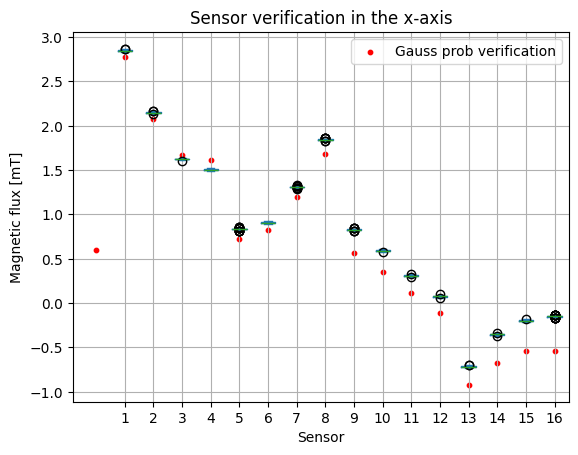

<Figure size 2000x600 with 0 Axes>

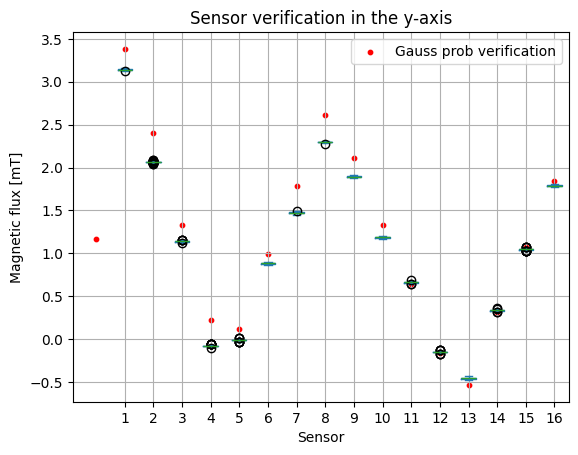

<Figure size 2000x600 with 0 Axes>

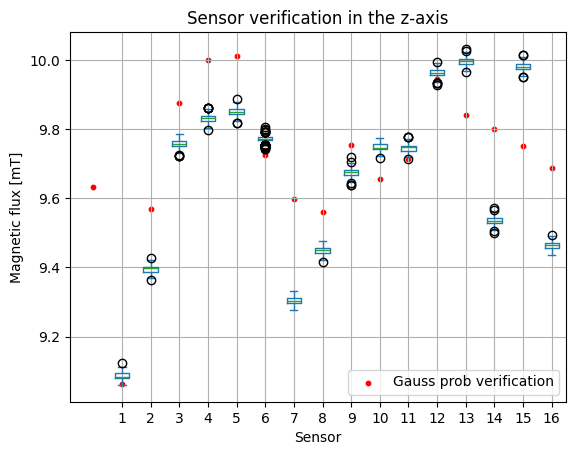

In [90]:
plot_sensor_ver(Test1_values, Gaussmeter_test1,'X', 'Sensor verification in the x-axis')
plot_sensor_ver(Test1_values, Gaussmeter_test1,'Y', 'Sensor verification in the y-axis')
plot_sensor_ver(Test1_values, Gaussmeter_test1,'Z', 'Sensor verification in the z-axis')

Test_2

<Figure size 2000x600 with 0 Axes>

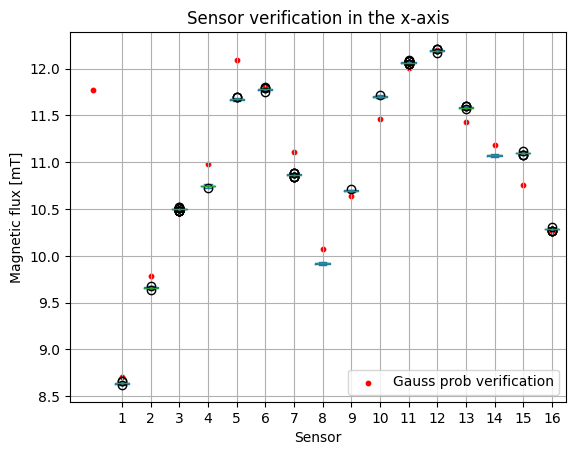

<Figure size 2000x600 with 0 Axes>

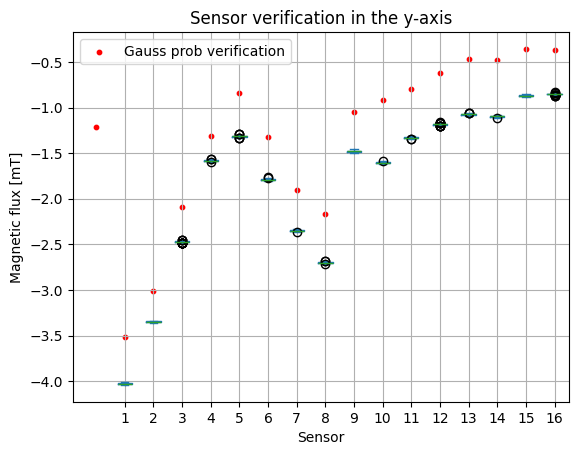

<Figure size 2000x600 with 0 Axes>

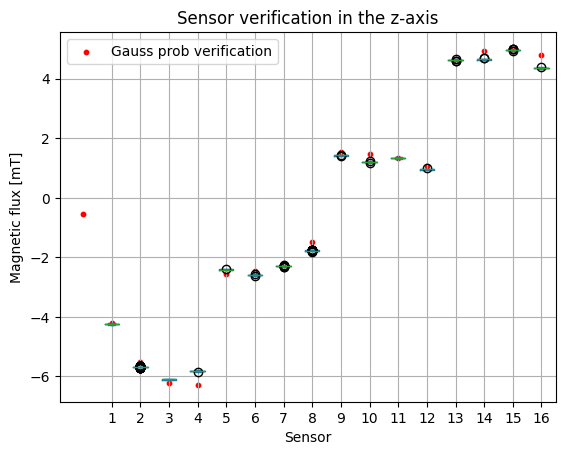

In [91]:
plot_sensor_ver(Test2_values, Gaussmeter_test2,'X','Sensor verification in the x-axis')
plot_sensor_ver(Test2_values, Gaussmeter_test2,'Y', 'Sensor verification in the y-axis')
plot_sensor_ver(Test2_values, Gaussmeter_test2,'Z', 'Sensor verification in the z-axis')

Test 3

<Figure size 2000x600 with 0 Axes>

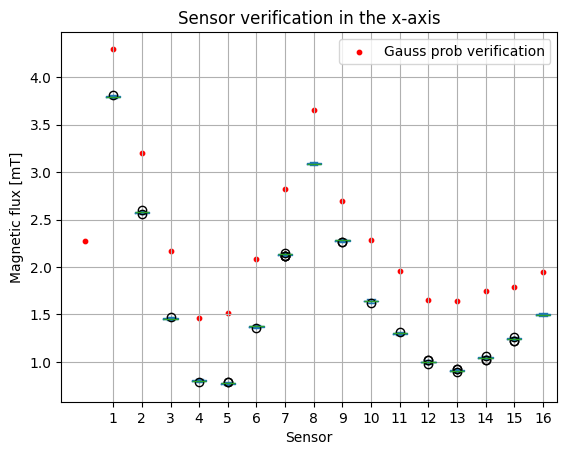

<Figure size 2000x600 with 0 Axes>

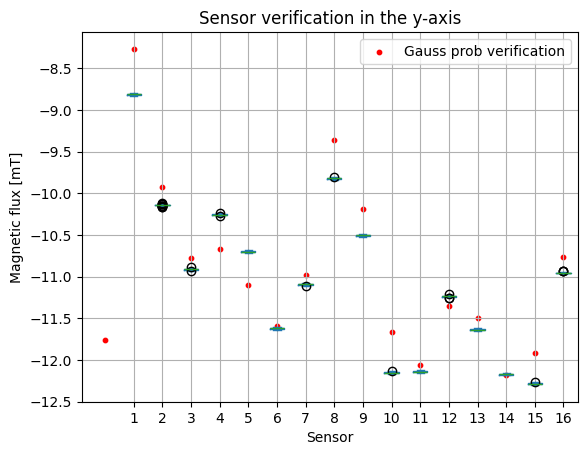

<Figure size 2000x600 with 0 Axes>

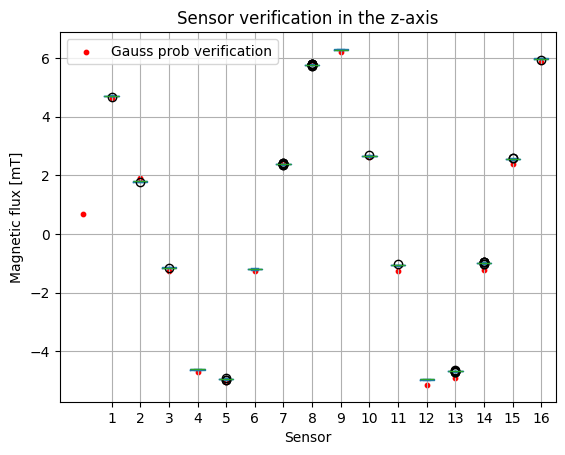

In [156]:
plot_sensor_ver(Test3_values, Gaussmeter_test3,'X', 'Sensor verification in the x-axis')
plot_sensor_ver(Test3_values, Gaussmeter_test3,'Y', 'Sensor verification in the y-axis')
plot_sensor_ver(Test3_values, Gaussmeter_test3,'Z', 'Sensor verification in the z-axis')